#Работа с категориальными признаками

In [1]:
#подключаю гуглдиск
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#import frameworks
import pandas as pd
import seaborn as sns
from sklearn import tree

In [3]:
#Загрузка наших данных
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/students.csv', delimiter=',')

In [ ]:
#Создание кодера, который "переводит" слова в числа
from sklearn import preprocessing
coder=preprocessing.LabelEncoder()
coder.fit(df['Sex'])
coder.transform(df['Sex'])

In [ ]:
print(df['Sex'])

In [16]:
for name in ['Coin', 'Animal', 'Army']:
  coder.fit(df[name])
  coder.transform(df[name])
  df[name]=coder.transform(df[name])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          186 non-null    int64  
 1   Growth                       186 non-null    int64  
 2   Shoe size                    186 non-null    int64  
 3   Course number                186 non-null    int64  
 4   Year of birth                186 non-null    int64  
 5   Friend number                186 non-null    int64  
 6   Russian rating               186 non-null    int64  
 7   Maths rating                 186 non-null    int64  
 8   Physics rating               186 non-null    int64  
 9   Computer science rating      186 non-null    int64  
 10  Chemistry rating             186 non-null    int64  
 11  Literature rating            186 non-null    int64  
 12  History rating               186 non-null    int64  
 13  Geography rating    

In [25]:
df_cut=df[['Growth', 'Weight', 'Sex', 'Hair length', 'Children number', 'Coin', 'Animal', 'Army']]
df_cut=df_cut.dropna()

In [ ]:
#создаем и запускаем обучаться модель ИИ
model=tree.DecisionTreeClassifier(max_depth=4)
model.fit(df_cut[['Growth', 'Weight', 'Hair length', 'Children number', 'Coin', 'Animal', 'Army']].values.reshape(-1,7), y=df_cut['Sex'].values)

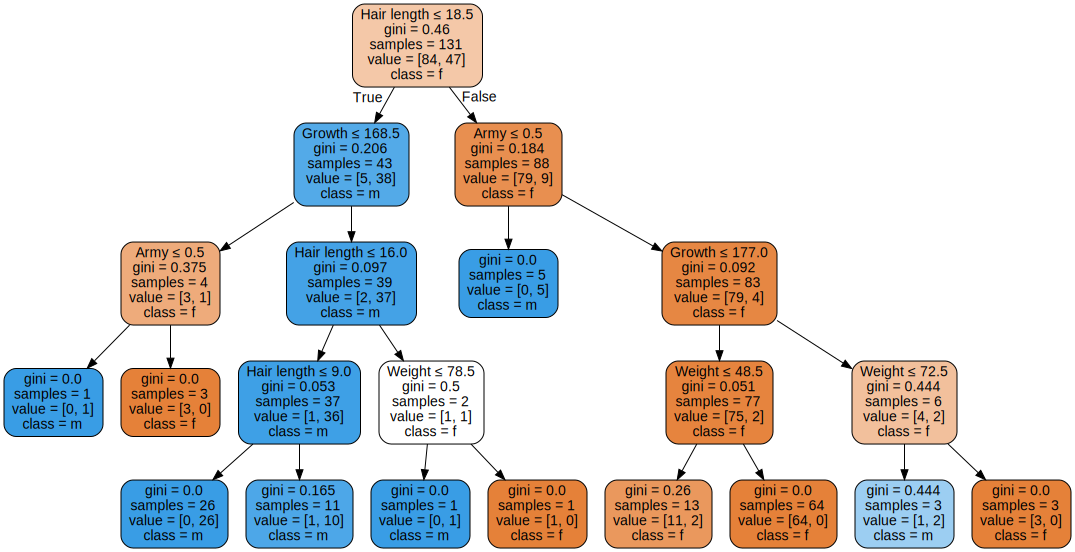

In [28]:
import graphviz
dot_data = tree.export_graphviz(model, out_file=None,
                                feature_names=['Growth', 'Weight', 'Hair length', 'Children number', 'Coin', 'Animal', 'Army'],
                                class_names=['f', 'm'],
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph